*** Machine Learning ***

Many machine learning techniques been there for long time. 

first linear regression is in 1800s
first neural network in 1950
first algorithm for image detection in 1980

only in recent times it is hyped because we did not have computer improvment with more computing power and also did not had enough data.

2012 is the year of image detection
2018 is the year of language models.

Now they have optimized the algorithm and did lot of things so we could run smaller models locally. 

It has taken a lot of techniques from statistics and there are lot of things which is in ML and not in statistics. so, It is combination of statistics , computer sciences and so on. 

Is it like how to run math models efficiently in one or more computer 

Neural networks are initially thought to be same as human brain but it is not same. And human behvaiour is more powerful than that.


Simple terms:

Machine Learning 
    - automated statistical models which works for structured / tabular data
    - There are different algorithms mostly like linear & logistics regression, decision trees
    
Deep Learning 
    - It is used to be part of machine learning and now this has become separate field altogether.
    - Useful for both structure and unstructured data like images, audio, text, etc., 
    - It is more powerful than traditional ML and also takes more time to train the model than ML
    - It used neural network with many layers. 
    - Example application is auto driving car

Data Science
    - Data Collection -Gathering raw data from various sources like databases, APIs, sensors, social media, etc.
    - Data Cleaning & Preprocessing - Handling missing values, fixing errors, formatting data—making sure it’s ready for analysis.
    - Exploratory Data Analysis  - summarize the data using visualization & statistics to understand relationship
    - Statistical Analysis & Modeling - Applying mathematical models to understand data trends and make predictions

Predictive Analysis
    - Focuses on prediction/ forecasts where as DataScience can work purely on the complex past data

Artificial Inteligence
    - AI is the broader concept of creating machines or systems that can mimic human intelligence think reasoning, learning, problem-solving, perception and even creativity.


Few models which we use commonly
    - linear models (linear and logistics regression)
    - decision trees (random forest, gradient boosted machines like LightGBM or XGBoost)
    - neural networks - customize the model as we want
        - dense network for simple datasets
        - convolution neural network for working with images
        - recurrent neural network for datasets with time aspects (eg: games, stocks)


# How does it work?

We define our history of data as input and output
Algoritm uses this data to define the pattern
Use this pattern to find the output for the new input

Input 
    - Input to the algorithm always should be numeric
    - images (pixel values, color codes)
    - If its text, numeric representation of words

Ouput 
    - we need to label it
    - If we send images like cat, sparrow and we have label it as animal, birds
    - Also called it as targets

Combined
    - Input data is also called as Features and it mapped to the target/output






# Import all the required libraries

In [13]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# working with tables and data from other sources 
import pandas as pd

# controlling display when using dataframe, some has very less value as default
pd.set_option('display.max_columns', 300)
pd.set_option('max_colwidth', 400)
pd.set_option('display.max_rows', 300)

# general library to work with arrays and metrics
import numpy as np

# Tensor flow 
# Training deep learning model is slow in normal CPU
# Tensorflow can run on GPU which makes training model faster especially for large datasets
# It also supports TPUs (Tensor Processing Units), custom chips from Google that are even faster than GPUs for some tasks.
# pytorch can be used if we want to use CPU for deep learning
import tensorflow as tf

# many algorithms use random initialization. This will cause parts of these to generate the same data for every run.
# It is like weight in tensorflow and if it sets different random with start, each time we run we get different results.
np.random.seed(1)
tf.random.set_seed(1)


# for traditional machine learning, we can use sklearn
# regression, classification
import sklearn as sk


# for plot
import matplotlib.pyplot as plt



2025-07-29 12:10:42.576075: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# to check GPU can be used

print(tf.test.gpu_device_name)

<function gpu_device_name at 0x126819620>


# Load Dataset and inspect data 

Taken the data sets from Kaggle - https://www.kaggle.com/

In [4]:
orders_dataset = pd.read_csv('./testdata/order_history_kaggle_data.csv')

# see the data with prints number of rows and colums

orders_dataset.shape


(21321, 29)

In [5]:
# column name
orders_dataset.columns

Index(['Restaurant ID', 'Restaurant name', 'Subzone', 'City', 'Order ID',
       'Order Placed At', 'Order Status', 'Delivery', 'Distance',
       'Items in order', 'Instructions', 'Discount construct', 'Bill subtotal',
       'Packaging charges', 'Restaurant discount (Promo)',
       'Restaurant discount (Flat offs, Freebies & others)', 'Gold discount',
       'Brand pack discount', 'Total', 'Rating', 'Review',
       'Cancellation / Rejection reason',
       'Restaurant compensation (Cancellation)',
       'Restaurant penalty (Rejection)', 'KPT duration (minutes)',
       'Rider wait time (minutes)', 'Order Ready Marked',
       'Customer complaint tag', 'Customer ID'],
      dtype='object')

In [6]:
# sample data how it looks
orders_dataset.head()

,Restaurant ID,Restaurant name,Subzone,City,Order ID,Order Placed At,Order Status,Delivery,Distance,Items in order,Instructions,Discount construct,Bill subtotal,Packaging charges,Restaurant discount (Promo),"Restaurant discount (Flat offs, Freebies & others)",Gold discount,Brand pack discount,Total,Rating,Review,Cancellation / Rejection reason,Restaurant compensation (Cancellation),Restaurant penalty (Rejection),KPT duration (minutes),Rider wait time (minutes),Order Ready Marked,Customer complaint tag,Customer ID
0,20320607,Swaad,Sector 4,Delhi NCR,6168884918,"11:38 PM, September 10 2024",Delivered,Zomato Delivery,3km,"1 x Grilled Chicken Jamaican Tender, 1 x Grilled Chicken Peri Peri Tangdi",NaN,40% off upto Rs.80,715.0,31.75,80.0,0.0,0.0,0.0,666.75,NaN,NaN,NaN,NaN,NaN,18.35,11.6,Correctly,NaN,5d6c2b96db963098bc69768bea504c8bf46106a8a5178edf91a42e66a8179458
1,20320607,Swaad,Sector 4,Delhi NCR,6170707559,"11:34 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Fries, 1 x Fried Chicken Angara Tender, 1 x Grilled Chicken Angara Tender",NaN,Flat Rs.175 off,1179.0,50.20,175.0,0.0,0.0,0.0,1054.20,NaN,NaN,NaN,NaN,NaN,16.95,3.6,Correctly,NaN,0781815deb4a10a574e9fee4fa0b86b074d4a0b36175d5a626dbc4710568bff4
2,20320607,Swaad,Sector 4,Delhi NCR,6169375019,"03:52 PM, September 10 2024",Delivered,Zomato Delivery,<1km,1 x Bone in Peri Peri Grilled Chicken,NaN,40% off upto Rs.80,310.0,11.50,80.0,0.0,0.0,0.0,241.50,NaN,NaN,NaN,NaN,NaN,14.05,12.2,Correctly,NaN,f93362f5ce5382657482d164e368186bcec9c6225fd93d374453a2e6983151de
3,20320607,Swaad,Sector 4,Delhi NCR,6151677434,"03:45 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Fried Chicken Ghostbuster Tender, 1 x Angara Grilled Paneer (8 pcs)",NaN,40% off upto Rs.80,620.0,27.00,80.0,0.0,0.0,0.0,567.00,4.0,NaN,NaN,NaN,NaN,19.00,3.3,Correctly,NaN,1ed226d1b8a5f7acee12fc1d6676558330a3b2b742af5d5c9d3ea550397d49ac
4,20320607,Swaad,Sector 4,Delhi NCR,6167540897,"03:04 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Krispers, 1 x Fried Chicken Angara Tender",NaN,40% off upto Rs.80,584.0,25.20,80.0,0.0,0.0,0.0,529.20,NaN,NaN,NaN,NaN,NaN,15.97,1.0,Correctly,NaN,d21a2ac6ea06b31cc3288ab20c4ef2f292066c096f2c5f110a3098eeb39596d9


In [7]:
# Basic statistics for numerical column

orders_dataset.describe()

,Restaurant ID,Order ID,Bill subtotal,Packaging charges,Restaurant discount (Promo),"Restaurant discount (Flat offs, Freebies & others)",Gold discount,Brand pack discount,Total,Rating,Restaurant compensation (Cancellation),Restaurant penalty (Rejection),KPT duration (minutes),Rider wait time (minutes)
count,2.132100e+04,2.132100e+04,21321.000000,21321.000000,21321.000000,21321.000000,21321.000000,21321.000000,21321.000000,2491.000000,133.000000,3.0,21026.000000,21153.000000
mean,2.074413e+07,6.354622e+09,750.076838,32.564592,65.091816,31.795058,0.099128,3.039324,682.616113,4.356885,356.409549,0.0,17.332960,4.825070
std,2.447193e+05,1.230263e+08,498.759428,22.235898,85.401604,131.487091,3.264261,17.070780,465.313977,1.181472,328.128240,0.0,6.283388,4.982591
min,2.032061e+07,6.086767e+09,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.500000,1.000000,83.580000,0.0,0.000000,0.100000
25%,2.063570e+07,6.250751e+09,459.000000,18.450000,0.000000,0.000000,0.000000,0.000000,387.450000,4.000000,191.950000,0.0,13.380000,1.000000
50%,2.065987e+07,6.357715e+09,629.000000,28.450000,80.000000,0.000000,0.000000,0.000000,597.450000,5.000000,272.580000,0.0,16.330000,3.100000
75%,2.088265e+07,6.456827e+09,899.000000,39.950000,100.000000,0.000000,0.000000,0.000000,837.900000,5.000000,397.840000,0.0,20.050000,7.400000
max,2.152306e+07,6.573392e+09,16080.000000,603.000000,4020.000000,7787.000000,280.100000,554.800000,12663.000000,5.000000,3236.980000,0.0,90.870000,73.800000


In [8]:
# check missing values and display as percentage
# It calculate the null valye for each column
missing_values = orders_dataset.isnull().sum() 
print(missing_values) 


Restaurant ID                                             0
Restaurant name                                           0
Subzone                                                   0
City                                                      0
Order ID                                                  0
Order Placed At                                           0
Order Status                                              0
Delivery                                                  0
Distance                                                  0
Items in order                                            0
Instructions                                          20601
Discount construct                                     5498
Bill subtotal                                             0
Packaging charges                                         0
Restaurant discount (Promo)                               0
Restaurant discount (Flat offs, Freebies & others)        0
Gold discount                           

In [9]:
# percentage of missing values for each column
# len -> returns number of rows
missing_data_percent= (missing_values / len(orders_dataset)) * 100
print(missing_data_percent)

Restaurant ID                                          0.000000
Restaurant name                                        0.000000
Subzone                                                0.000000
City                                                   0.000000
Order ID                                               0.000000
Order Placed At                                        0.000000
Order Status                                           0.000000
Delivery                                               0.000000
Distance                                               0.000000
Items in order                                         0.000000
Instructions                                          96.623048
Discount construct                                    25.786783
Bill subtotal                                          0.000000
Packaging charges                                      0.000000
Restaurant discount (Promo)                            0.000000
Restaurant discount (Flat offs, Freebies

In [10]:
# unique values categorization

# select_dtypes(include=['object']) will select the object type columns which in pandas is string 
categorical_cols = orders_dataset.select_dtypes(include=['object']).columns

for c in categorical_cols:
    print(f' the column is {c} and the unique data count is {orders_dataset[c].nunique()}')
    if orders_dataset[c].nunique() < 10 :
        print (orders_dataset[c].value_counts())

 the column is Restaurant name and the unique data count is 6
Restaurant name
Aura Pizzas             14548
Swaad                    6332
Dilli Burger Adda         227
Tandoori Junction         154
The Chicken Junction       32
Masala Junction            28
Name: count, dtype: int64
 the column is Subzone and the unique data count is 8
Subzone
Greater Kailash 2 (GK2)    7380
Sector 4                   6530
DLF Phase 1                3686
Sector 135                 2442
Vasant Kunj                 920
Shahdara                    360
Chittaranjan Park             2
Sikandarpur                   1
Name: count, dtype: int64
 the column is City and the unique data count is 1
City
Delhi NCR    21321
Name: count, dtype: int64
 the column is Order Placed At and the unique data count is 19114
 the column is Order Status and the unique data count is 6
Order Status
Delivered           21131
Rejected              158
Returned               25
Return cancelled        3
Picked up               3
Tim

# Data Cleaning and Preprocessing

In [11]:
# format the date time colum to get month day hour and date
# we have date like 11:38 PM, September 10 2024	

def parse_datetime(date_str):
    try:
        # extract the time part and date part
        time_part, date_part = date_str.split(', ')

        # combine date time properly
        datetime_str = f'{date_part} {time_part}'

        # "September 10 2024 11:38 PM"
        return pd.to_datetime(datetime_str, format='%B %d %Y %I:%M %p')
    except: 
        return pd.NaT
    

orders_dataset['Order Placed At'] = orders_dataset['Order Placed At'].apply(parse_datetime)

# add additional information to the dataframe
orders_dataset['Order Day'] = orders_dataset['Order Placed At'].dt.day_name()
orders_dataset['Order Month'] = orders_dataset['Order Placed At'].dt.month_name()
orders_dataset['Order Hour'] = orders_dataset['Order Placed At'].dt.hour
orders_dataset['Order Date'] = orders_dataset['Order Placed At'].dt.date

print("Date-time processing completed")


# clean distance column - we have < as value eg: <1km

def clean_distance(distance_str):
    if pd.isna(distance_str): # if not an number return 
        return np.nan # special value defined by IEEE standard to represent missing or undefined numerical data
    elif '<' in distance_str:
        return 0.5  # assuming <1km means 0.5km
    else : 
        return float(distance_str.replace('km', ''))

orders_dataset['Distance'] = orders_dataset['Distance'].apply(clean_distance)

print("Distance column cleaned")



# extract numeber of items from Items in order
# strcuture is 1 x Grilled Chicken Jamaican Tender, 1 x Gril

import re

def extract_items_Count(items_str):
    if pd.isna(items_str):
        return 0
    # Find all patterns like "X x Item"
    matches = re.findall(r'(\d+)\s*x\s*', items_str)

    count = sum(int(match) for match in matches)

    return count

orders_dataset['Item Count'] = orders_dataset['Items in order'].apply(extract_items_Count)

print("Item count extracted")

# handle missing values


# Fill categorical NaN values with 'None' or 'Unknown'
# inplace means directl apply the changes
orders_dataset['Instructions']= orders_dataset['Instructions'].fillna('None')
orders_dataset['Discount construct'] = orders_dataset['Discount construct'].fillna('No Discount')
orders_dataset['Customer complaint tag'] = orders_dataset['Customer complaint tag'].fillna('No Complaint')
orders_dataset['Review'] = orders_dataset['Review'].fillna('No Review')
orders_dataset['Cancellation / Rejection reason'] = orders_dataset['Cancellation / Rejection reason'].fillna('No Cancellation')

# For Rating, fill NaN with the median rating
orders_dataset['Rating']= orders_dataset['Rating'].fillna(orders_dataset['Rating'].median())

orders_dataset['KPT duration (minutes)']= orders_dataset['KPT duration (minutes)'].fillna(orders_dataset['KPT duration (minutes)'].median())
orders_dataset['Rider wait time (minutes)'] = orders_dataset['Rider wait time (minutes)'].fillna(orders_dataset['Rider wait time (minutes)'].median())


print("Missing values handled")


# create delivery status feature in numbers
# we need to use apply as it run every column on the data frame

orders_dataset['Is_Delivered'] = orders_dataset['Order Status'].apply( lambda x: 1 if x == 'Delivered' else 0)
orders_dataset['Has_Complaint'] = orders_dataset['Customer complaint tag'].apply(lambda x: 0 if x == 'No Complaint' else 1)
orders_dataset['Delivery_Issue'] = orders_dataset['Order Ready Marked'].apply(lambda x: 0 if x == 'Correctly' else 1)


# Create discount features as we have different column now for discounts

orders_dataset['Total_Discount'] = orders_dataset['Restaurant discount (Promo)'] + orders_dataset['Restaurant discount (Flat offs, Freebies & others)'] + orders_dataset['Gold discount'] + orders_dataset['Brand pack discount']
orders_dataset['Discount_Percentage'] = (orders_dataset['Total_Discount'] / orders_dataset['Bill subtotal'] * 100).round(2)


# create time based features

orders_dataset['Is_Weekend'] = orders_dataset['Order Day'].apply(lambda x :1 if x in  ['Saturday', 'Sunday'] else 0)
orders_dataset['Is_Peak_Hour'] = orders_dataset['Order Hour'].apply(lambda x: 1 if x in [12, 13, 19, 20, 21] else 0)  # Lunch and dinner hours

# remove outliners
# lets say we have total order value is 10_000, this is way differ from others , to correct this
# we use diffeent technique z -score formula = value - mean / std and if Z is greater than the threshold, it is considered an outliner
# removeing this help with better visualization , more stable ml and cleaner statistics

# Check for and remove extreme outliers (optional)
def remove_outliers(df, columns, threshold=3):
    df_clean = df.copy()
    for col in columns:
        mean = df[col].mean()
        std = df[col].std()
        outliers = (df_clean[col] < mean - threshold * std) | (df_clean[col] > mean + threshold * std)
        df_clean = df_clean[~outliers] # remove the rows if outliner is there
    return df_clean

# List of numeric columns to check for outliers
numeric_cols = ['Bill subtotal', 'Total', 'KPT duration (minutes)', 'Rider wait time (minutes)', 'Distance']
orders_dataset_no_outliners = remove_outliers(orders_dataset, numeric_cols) # remove the rows if it falls in there

print(f"Removed {len(orders_dataset) - len(orders_dataset_no_outliners)} outliers") 
print(f"Shape after cleaning: {orders_dataset_no_outliners.shape}")


# Display the updated dataframe
print("\nFirst 5 rows of the cleaned dataset:")
display(orders_dataset_no_outliners.head())


Date-time processing completed
Distance column cleaned
Item count extracted
Missing values handled
Removed 1064 outliers
Shape after cleaning: (20257, 41)

First 5 rows of the cleaned dataset:


,Restaurant ID,Restaurant name,Subzone,City,Order ID,Order Placed At,Order Status,Delivery,Distance,Items in order,Instructions,Discount construct,Bill subtotal,Packaging charges,Restaurant discount (Promo),"Restaurant discount (Flat offs, Freebies & others)",Gold discount,Brand pack discount,Total,Rating,Review,Cancellation / Rejection reason,Restaurant compensation (Cancellation),Restaurant penalty (Rejection),KPT duration (minutes),Rider wait time (minutes),Order Ready Marked,Customer complaint tag,Customer ID,Order Day,Order Month,Order Hour,Order Date,Item Count,Is_Delivered,Has_Complaint,Delivery_Issue,Total_Discount,Discount_Percentage,Is_Weekend,Is_Peak_Hour
0,20320607,Swaad,Sector 4,Delhi NCR,6168884918,2024-09-10 23:38:00,Delivered,Zomato Delivery,3.0,"1 x Grilled Chicken Jamaican Tender, 1 x Grilled Chicken Peri Peri Tangdi",None,40% off upto Rs.80,715.0,31.75,80.0,0.0,0.0,0.0,666.75,5.0,No Review,No Cancellation,NaN,NaN,18.35,11.6,Correctly,No Complaint,5d6c2b96db963098bc69768bea504c8bf46106a8a5178edf91a42e66a8179458,Tuesday,September,23,2024-09-10,2,1,0,0,80.0,11.19,0,0
1,20320607,Swaad,Sector 4,Delhi NCR,6170707559,2024-09-10 23:34:00,Delivered,Zomato Delivery,2.0,"1 x Peri Peri Fries, 1 x Fried Chicken Angara Tender, 1 x Grilled Chicken Angara Tender",None,Flat Rs.175 off,1179.0,50.20,175.0,0.0,0.0,0.0,1054.20,5.0,No Review,No Cancellation,NaN,NaN,16.95,3.6,Correctly,No Complaint,0781815deb4a10a574e9fee4fa0b86b074d4a0b36175d5a626dbc4710568bff4,Tuesday,September,23,2024-09-10,3,1,0,0,175.0,14.84,0,0
2,20320607,Swaad,Sector 4,Delhi NCR,6169375019,2024-09-10 15:52:00,Delivered,Zomato Delivery,0.5,1 x Bone in Peri Peri Grilled Chicken,None,40% off upto Rs.80,310.0,11.50,80.0,0.0,0.0,0.0,241.50,5.0,No Review,No Cancellation,NaN,NaN,14.05,12.2,Correctly,No Complaint,f93362f5ce5382657482d164e368186bcec9c6225fd93d374453a2e6983151de,Tuesday,September,15,2024-09-10,1,1,0,0,80.0,25.81,0,0
3,20320607,Swaad,Sector 4,Delhi NCR,6151677434,2024-09-10 15:45:00,Delivered,Zomato Delivery,2.0,"1 x Fried Chicken Ghostbuster Tender, 1 x Angara Grilled Paneer (8 pcs)",None,40% off upto Rs.80,620.0,27.00,80.0,0.0,0.0,0.0,567.00,4.0,No Review,No Cancellation,NaN,NaN,19.00,3.3,Correctly,No Complaint,1ed226d1b8a5f7acee12fc1d6676558330a3b2b742af5d5c9d3ea550397d49ac,Tuesday,September,15,2024-09-10,2,1,0,0,80.0,12.90,0,0
4,20320607,Swaad,Sector 4,Delhi NCR,6167540897,2024-09-10 15:04:00,Delivered,Zomato Delivery,2.0,"1 x Peri Peri Krispers, 1 x Fried Chicken Angara Tender",None,40% off upto Rs.80,584.0,25.20,80.0,0.0,0.0,0.0,529.20,5.0,No Review,No Cancellation,NaN,NaN,15.97,1.0,Correctly,No Complaint,d21a2ac6ea06b31cc3288ab20c4ef2f292066c096f2c5f110a3098eeb39596d9,Tuesday,September,15,2024-09-10,2,1,0,0,80.0,13.70,0,0


# Exploratory Data Analysis (EDA)

- We also need to understand the relationship between each data 
- Gain insight business - like which restaurant gets more order , wehn
- form hypothesis like weekend sales are higher?
- Create the plots to understand the data very well like trends and patterns
- Guide feaure (input) creation for models


<Axes: title={'center': 'Distribution of Order Status'}, xlabel='Order Status'>

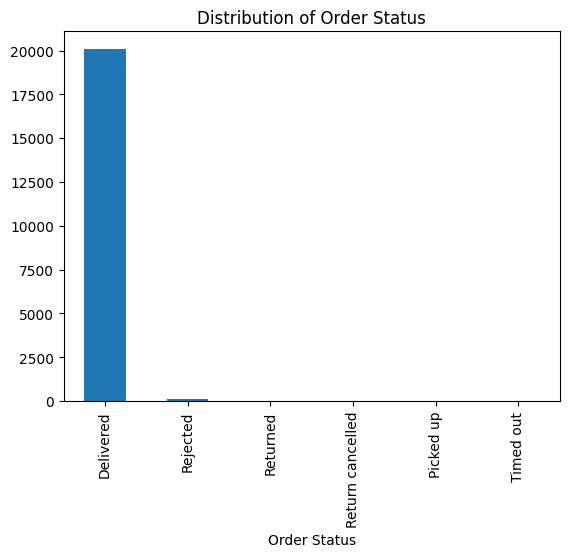

In [ ]:
# distribution of order status
# value_counts() - count each group
orders_dataset_no_outliners['Order Status'].value_counts().plot.bar(title='Distribution of Order Status' )


<Axes: title={'center': 'Distribution of Order Status'}, ylabel='count'>

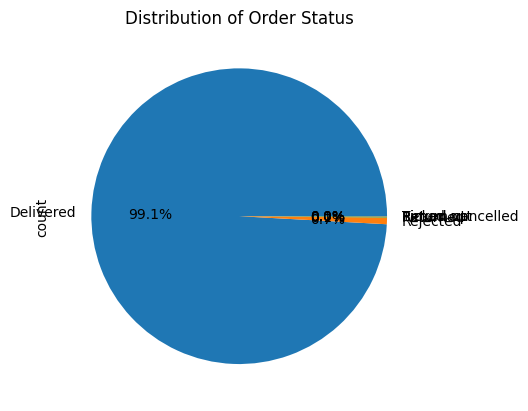

In [22]:
# in pie chart
# autopct - display percentage 
orders_dataset_no_outliners['Order Status'].value_counts().plot.pie(autopct='%1.1f%%', title='Distribution of Order Status' )

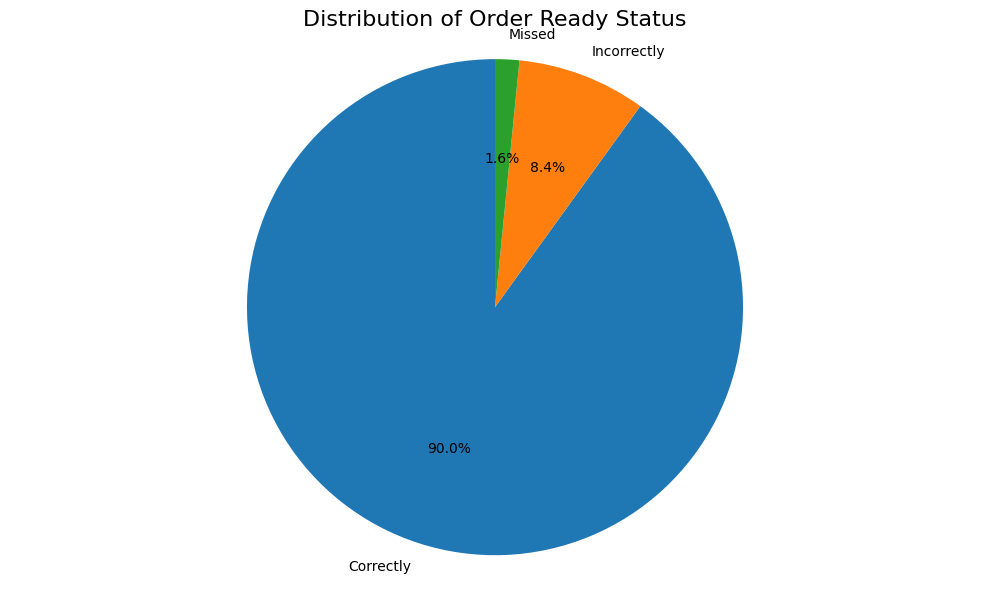

In [25]:
plt.figure(figsize=(10, 6))
ready_status = orders_dataset_no_outliners['Order Ready Marked'].value_counts()
labels = ready_status.index
plt.pie(ready_status.values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Order Ready Status', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()

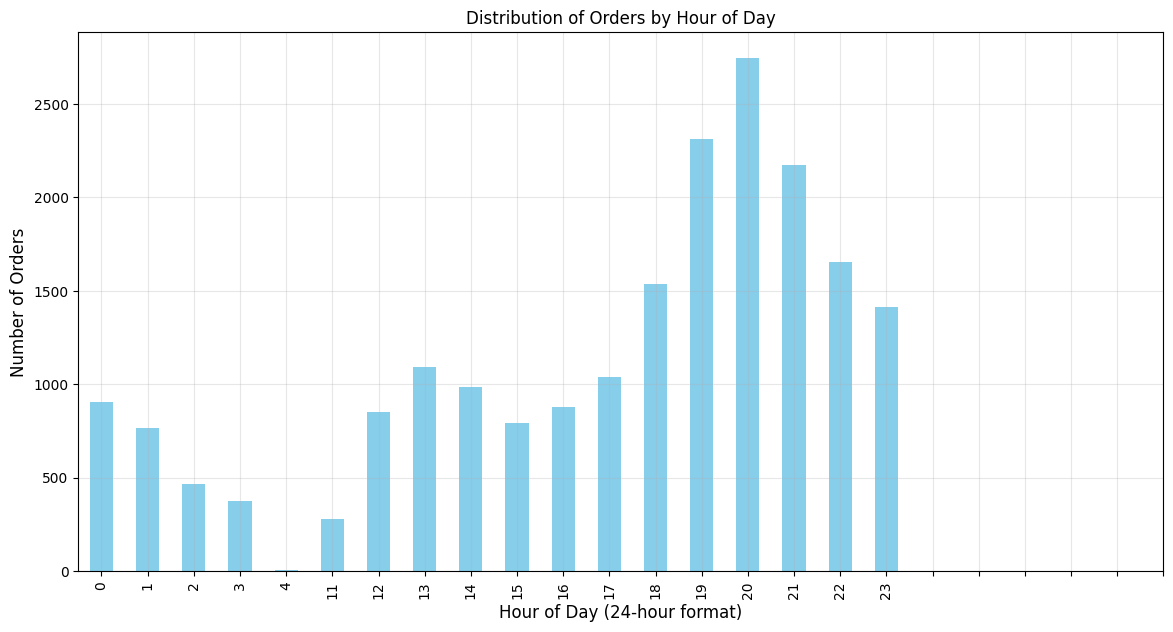

In [26]:
# Group and count orders by hour
hour_order = orders_dataset_no_outliners.groupby('Order Hour')['Order ID'].count()

# Plot using pandas plot.bar()
ax = hour_order.plot.bar(
    figsize=(14, 7),
    color='skyblue',
    title='Distribution of Orders by Hour of Day'
)

ax.set_xlabel('Hour of Day (24-hour format)', fontsize=12)
ax.set_ylabel('Number of Orders', fontsize=12)
ax.set_xticks(range(0, 24))
ax.grid(True, alpha=0.3)

plt.show()

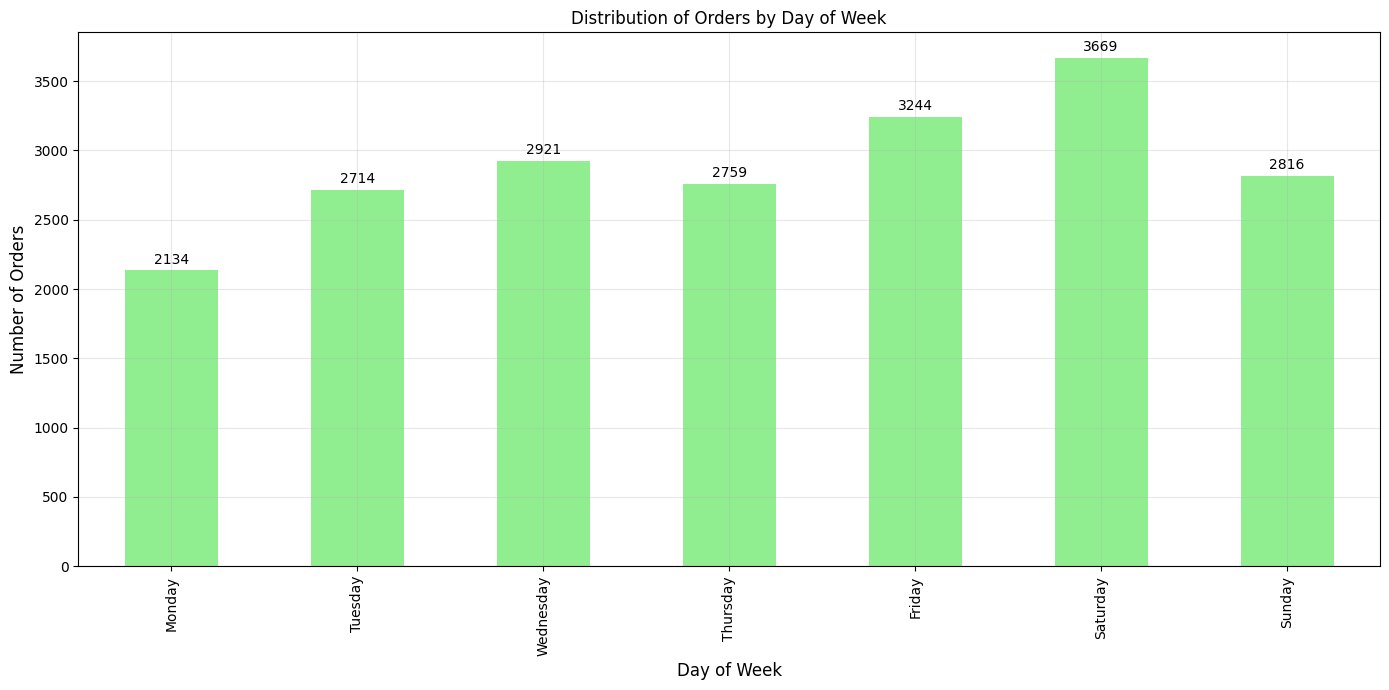

In [27]:


# Count orders by day and reindex to get the correct order of days
day_order = orders_dataset_no_outliners['Order Day'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Plot using pandas bar plot
ax = day_order.plot.bar(
    figsize=(14, 7),
    color='lightgreen',
    title='Distribution of Orders by Day of Week'
)

ax.set_xlabel('Day of Week', fontsize=12)
ax.set_ylabel('Number of Orders', fontsize=12)
ax.grid(True, alpha=0.3)

# Add count labels above bars
for i, count in enumerate(day_order.values):
    ax.text(i, count + 50, str(count), ha='center', fontsize=10)

plt.tight_layout()
plt.show()


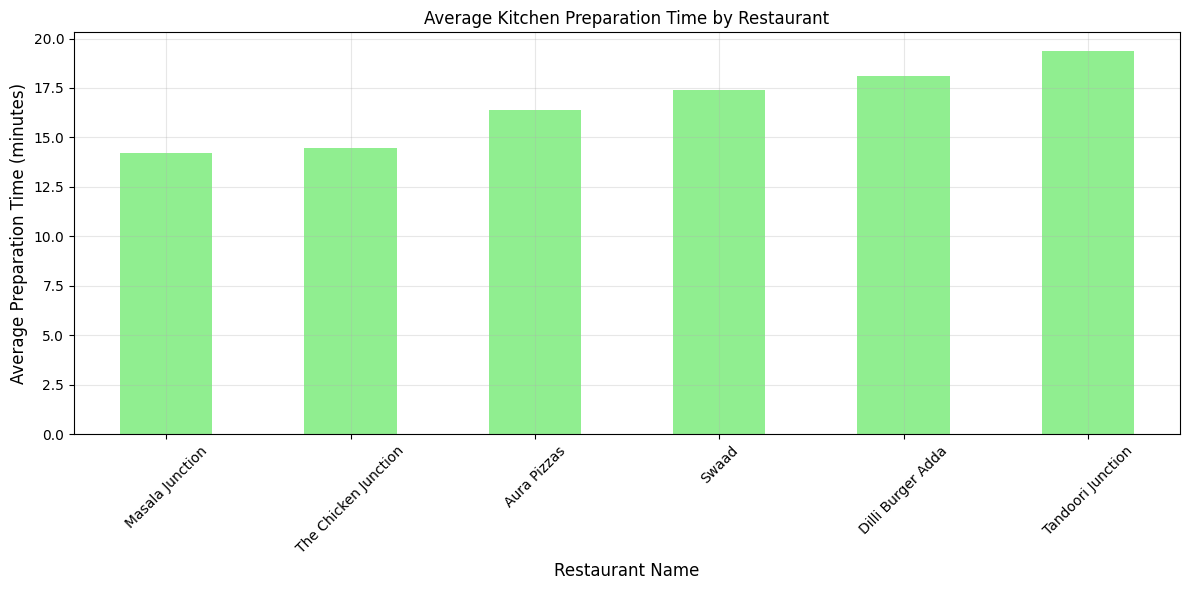

In [ ]:


# Calculate average prep times by restaurant, sorted
# group first by restaurant name, then select the KPT duration column , then calculate mean , then sort values
restaurant_prep_times = orders_dataset_no_outliners.groupby('Restaurant name')['KPT duration (minutes)'].mean().sort_values()

# Plot using pandas
ax = restaurant_prep_times.plot.bar(
    figsize=(12, 6),
    color='lightgreen',
    title='Average Kitchen Preparation Time by Restaurant'
)

ax.set_xlabel('Restaurant Name', fontsize=12)
ax.set_ylabel('Average Preparation Time (minutes)', fontsize=12)
ax.tick_params(axis='x', rotation=45)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


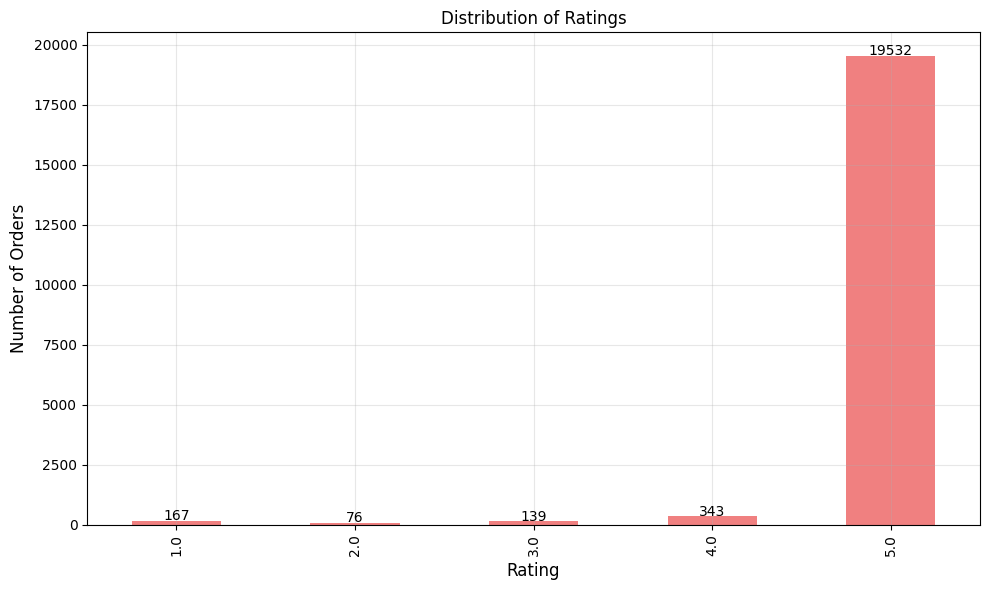

In [31]:


# Count ratings and sort by rating value
rating_counts = orders_dataset_no_outliners['Rating'].value_counts().sort_index()

# Plot with pandas
ax = rating_counts.plot.bar(
    figsize=(10, 6),
    color='lightcoral',
    title='Distribution of Ratings'
)

ax.set_xlabel('Rating', fontsize=12)
ax.set_ylabel('Number of Orders', fontsize=12)
ax.grid(True, alpha=0.3)

# Add count labels above bars
for i, count in enumerate(rating_counts.values):
    ax.text(i, count + 20, str(count), ha='center', fontsize=10)

plt.tight_layout()
plt.show()


# Statistical Analysis and Correlation Study 

In EDA, we can visually explore the distribution , trends, outliners, missing values
Correlation study helps understand which ones move together. This helps in feature selection and model building


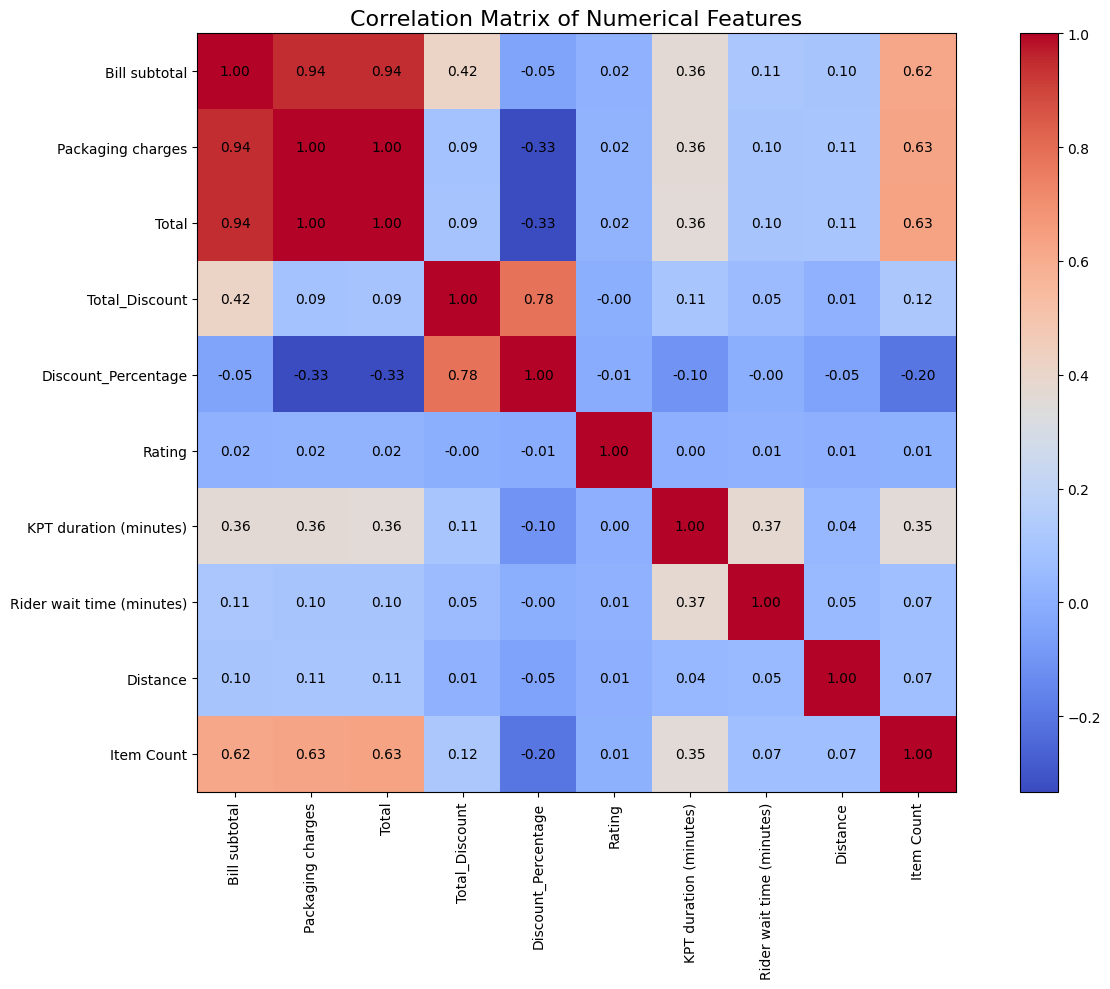

In [ ]:
# Select numerical columns for correlation analysis
''' 
If correlation_matrix['Total']['Bill subtotal'] = 0.96, then:

As the bill subtotal increases, the total also increases — strongly and linearly.

If correlation_matrix['Rating']['Discount_Percentage'] = -0.3, then:

Higher discounts may slightly correlate with lower customer ratings.

'''
numerical_cols = ['Bill subtotal', 'Packaging charges', 'Total', 'Total_Discount', 
                 'Discount_Percentage', 'Rating', 'KPT duration (minutes)', 
                 'Rider wait time (minutes)', 'Distance', 'Item Count']

# This create the correlation between each one 

correlation_matrix = orders_dataset_no_outliners[numerical_cols].corr()

#A heatmap is a visual way to understand the relationships between numerical variables — it turns raw correlation values into a color-coded chart, which is much easier to interpret at a glance.

# Create a heatmap
plt.figure(figsize=(14, 10))
# Use basic heatmap with annotated values
im = plt.imshow(correlation_matrix, cmap='coolwarm')
plt.colorbar(im)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)

for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                       ha="center", va="center", color="black")

plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.tight_layout()
plt.show()

# if packaging chargs and discount is -0.33, means no linear relationship

- T-Test - To check if a difference in averages is real or random.
    - Use when we have one numeric variable (eg: rating)
    - We want to compare against two groups (fast delivery, slow delivery)
    - Ans whether average rating different for past and slow orders

- ANOVA (Analysis of Variance)
    - Compare the means of three or more groups.
    - Numeric variable preparation time and Grouped by a categorical variable with 3+ categories (e.g., restaurants)
    - Do different restaurants have different average prep times?
    - If we want to run this with t-test, we need to run n times eg: A VS B, B vs C, C vs A 
    - Each t-test has a 5% chance (p < 0.05) of showing a false difference by random chance. Multiple t test is not a good choice

- Chi-Square Test
    - Test for relationship between two categorical variables.
    - Both variables are categorical (e.g., Restaurant and Complaint)
    - To see if two categories are independent or associated.


----
Compare two categorical variables	- Chi-Square
Compare two numerical variables	    - Correlation
Compare mean rating between distance groups	- T-test / ANOVA

In [37]:
# Hypothesis Testing - Impact of Preparation Time on Ratings
from scipy import stats

# Create groups for hypothesis testing
# we re isolating the extremes to test for clear differences in customer satisfaction based on prep speed.
# quantile is 0.25 -> First quartile (Q1) — lower 25% cutoff, 0.75 -> Third quartile (Q3) — upper 25% cutoff

# fast 25% preparation time
fast_prep_ratings = orders_dataset_no_outliners[orders_dataset_no_outliners['KPT duration (minutes)'] < orders_dataset_no_outliners['KPT duration (minutes)'].quantile(0.25)]['Rating']
# last 25% preparation time
slow_prep_ratings = orders_dataset_no_outliners[orders_dataset_no_outliners['KPT duration (minutes)'] > orders_dataset_no_outliners['KPT duration (minutes)'].quantile(0.75)]['Rating']

# Perform t-test
t_stat, p_value = stats.ttest_ind(fast_prep_ratings, slow_prep_ratings, equal_var=False)

print("Hypothesis Test: Impact of Preparation Time on Ratings")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Mean rating for fast preparation: {fast_prep_ratings.mean():.2f}")
print(f"Mean rating for slow preparation: {slow_prep_ratings.mean():.2f}")
print(f"Significant difference: {'Yes' if p_value < 0.05 else 'No'}")
print("Interpretation: ", end="")

if p_value < 0.05:
    if fast_prep_ratings.mean() > slow_prep_ratings.mean():
        print("Faster preparation times are associated with significantly higher ratings.")
    else:
        print("Slower preparation times are associated with significantly higher ratings.")
else:
    print("There is no significant relationship between preparation time and ratings.")

Hypothesis Test: Impact of Preparation Time on Ratings
T-statistic: -0.5424
P-value: 0.5876
Mean rating for fast preparation: 4.93
Mean rating for slow preparation: 4.93
Significant difference: No
Interpretation: There is no significant relationship between preparation time and ratings.


In [39]:
# Hypothesis Testing - Impact of Distance on Delivery Issues
close_orders = orders_dataset_no_outliners[orders_dataset_no_outliners['Distance'] < orders_dataset_no_outliners['Distance'].quantile(0.25)]['Delivery_Issue']
far_orders = orders_dataset_no_outliners[orders_dataset_no_outliners['Distance'] > orders_dataset_no_outliners['Distance'].quantile(0.75)]['Delivery_Issue']

# Perform t-test
t_stat, p_value = stats.ttest_ind(close_orders, far_orders, equal_var=False)

print("\nHypothesis Test: Impact of Distance on Delivery Issues")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Mean delivery issues for close orders: {close_orders.mean():.2f}")
print(f"Mean delivery issues for far orders: {far_orders.mean():.2f}")
print(f"Significant difference: {'Yes' if p_value < 0.05 else 'No'}")
print("Interpretation: ", end="")
if p_value < 0.05:
    if close_orders.mean() < far_orders.mean():
        print("Orders delivered to farther distances have significantly more delivery issues.")
    else:
        print("Orders delivered to closer distances have significantly more delivery issues.")
else:
    print("There is no significant relationship between delivery distance and delivery issues.")


Hypothesis Test: Impact of Distance on Delivery Issues
T-statistic: -4.2625
P-value: 0.0000
Mean delivery issues for close orders: 0.08
Mean delivery issues for far orders: 0.11
Significant difference: Yes
Interpretation: Orders delivered to farther distances have significantly more delivery issues.


In [42]:
#  ANOVA - Restaurant Impact on Preparation Time
# it is for comparing more than 2 groups
# get all restaurants
restaurants = orders_dataset_no_outliners['Restaurant name'].unique()

# get preparation time for all the above restaurants 
prep_times_by_restaurant = [orders_dataset_no_outliners[orders_dataset_no_outliners['Restaurant name'] == r]['KPT duration (minutes)'] for r in restaurants]


# Perform ANOVA
# The * (splat operator) unpacks the list prep_times_by_restaurant so that each group's data is passed as a separate argument.
# this tell whether any restaurant preparation time is significantly higher
f_stat, p_value = stats.f_oneway(*prep_times_by_restaurant)

print("\nANOVA Test: Impact of Restaurant on Preparation Time")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Significant difference: {'Yes' if p_value < 0.05 else 'No'}")

if p_value < 0.05:
    print("There are significant differences in preparation times among restaurants.")
    # Display mean preparation times for each restaurant
    print("\nMean Preparation Times by Restaurant:")
    for i, r in enumerate(restaurants):
        mean_time = orders_dataset_no_outliners[orders_dataset_no_outliners['Restaurant name'] == r]['KPT duration (minutes)'].mean()
        print(f"{r}: {mean_time:.2f} minutes")
else:
    print("There are no significant differences in preparation times among restaurants.")



ANOVA Test: Impact of Restaurant on Preparation Time
F-statistic: 48.4356
P-value: 0.0000
Significant difference: Yes
There are significant differences in preparation times among restaurants.

Mean Preparation Times by Restaurant:
Swaad: 17.42 minutes
Aura Pizzas: 16.38 minutes
Dilli Burger Adda: 18.09 minutes
Tandoori Junction: 19.34 minutes
The Chicken Junction: 14.48 minutes
Masala Junction: 14.21 minutes


In [43]:
# Chi-Square Test - Relationship between Restaurant and Complaints
# Create a contingency table
# rows is restuatnt and column is has complaint
contingency = pd.crosstab(orders_dataset_no_outliners['Restaurant name'], orders_dataset_no_outliners['Has_Complaint'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency)

print("\nChi-Square Test: Relationship between Restaurant and Complaints")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"Significant relationship: {'Yes' if p_value < 0.05 else 'No'}")

if p_value < 0.05:
    print("There is a significant relationship between restaurant and complaint rate.")
    # Show complaint rates by restaurant
    complaint_rates = orders_dataset_no_outliners.groupby('Restaurant name')['Has_Complaint'].mean() * 100
    print("\nComplaint Rates by Restaurant:")
    for restaurant, rate in complaint_rates.items():
        print(f"{restaurant}: {rate:.2f}%")
else:
    print("There is no significant relationship between restaurant and complaint rate.")


Chi-Square Test: Relationship between Restaurant and Complaints
Chi-square statistic: 15.4799
P-value: 0.0085
Degrees of freedom: 5
Significant relationship: Yes
There is a significant relationship between restaurant and complaint rate.

Complaint Rates by Restaurant:
Aura Pizzas: 2.40%
Dilli Burger Adda: 3.32%
Masala Junction: 0.00%
Swaad: 1.68%
Tandoori Junction: 0.00%
The Chicken Junction: 4.17%


In [ ]:
 # Descriptive Statistics by Restaurant
# lower std -> close to the mean
restaurant_stats = orders_dataset_no_outliners.groupby('Restaurant name').agg({
    'Order ID': 'count',
    'Total': ['mean', 'median', 'std'],
    'Bill subtotal': ['mean', 'median', 'std'],
    'Total_Discount': ['mean', 'median', 'std'],
    'KPT duration (minutes)': ['mean', 'median', 'std'],
    'Rider wait time (minutes)': ['mean', 'median', 'std'],
    'Rating': ['mean', 'median', 'std'],
    'Distance': ['mean', 'median', 'std']
})

print("\nDescriptive Statistics by Restaurant:")
display(restaurant_stats)


Descriptive Statistics by Restaurant:


Order ID       Total                     Bill subtotal  \
                        count        mean  median         std          mean   
Restaurant name                                                               
Aura Pizzas             13690  687.588013  628.95  351.159941    745.579953   
Dilli Burger Adda         211  426.364408  367.50  257.984327    577.967820   
Masala Junction            21  328.100000  304.50  128.278298    368.190476   
Swaad                    6181  547.573818  483.00  306.728516    629.226182   
Tandoori Junction         130  814.232615  719.74  317.201681    768.144000   
The Chicken Junction       24  328.786667  283.50  198.814488    378.583333   

                                        Total_Discount                      \
                     median         std           mean  median         std   
Restaurant name                                                              
Aura Pizzas           649.0  365.826399      90.734824   93.00  111.470027   
Dilli Burger Adda     545.0  287.458855     171.907536  150.00  117.854150   
Masala Junction       350.0   96.656412      55.714286   90.00   44.785202   
Swaad                 585.0  331.252092     107.731702   80.00  130.722680   
Tandoori Junction     679.0  299.246884       0.000000    0.00    0.000000   
The Chicken Junction  340.0  204.708046      65.454167   89.55   45.316308   

                     KPT duration (minutes)                    \
                                       mean  median       std   
Restaurant name                                                 
Aura Pizzas                       16.376246  15.800  5.053676   
Dilli Burger Adda                 18.087536  17.180  5.717135   
Masala Junction                   14.205714  12.830  4.960351   
Swaad                             17.420885  16.880  5.034169   
Tandoori Junction                 19.344692  18.985  5.690184   
The Chicken Junction              14.475000  14.500  4.264954   

                     Rider wait time (minutes)                     Rating  \
                                          mean median       std      mean   
Restaurant name                                                             
Aura Pizzas                           4.529774    3.0  4.276077  4.920672   
Dilli Burger Adda                     4.169668    2.5  4.387105  4.876777   
Masala Junction                       4.800000    3.1  4.327008  4.809524   
Swaad                                 4.269212    2.8  4.132806  4.937712   
Tandoori Junction                     5.026923    3.5  4.909314  4.938462   
The Chicken Junction                  5.058333    4.4  4.531428  4.666667   

                                       Distance                   
                     median       std      mean median       std  
Restaurant name                                                   
Aura Pizzas             5.0  0.471858  4.101534    4.0  2.699155  
Dilli Burger Adda       5.0  0.563983  3.125592    3.0  2.053362  
Masala Junction         5.0  0.402374  7.476190    8.0  2.993644  
Swaad                   5.0  0.400449  3.683142    3.0  2.447083  
Tandoori Junction       5.0  0.388873  4.984615    5.0  2.800151  
The Chicken Junction    5.0  0.637022  7.208333    8.0  2.750165

In [ ]:
# Feature Engineering and Model Preparation